[View in Colaboratory](https://colab.research.google.com/github/jasonrwang/ghg_analytics/blob/master/ghg_analytics.ipynb)

# ghg_analytics
## Insights into trends with global greenhouse gases and climate change action.

### Authors:
* Aashna Mittal
* Gamze Ünlü
* Jason R Wang

In [2]:
#library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import NaN
plt.style.use('ggplot')

## Data Cleaning

In [3]:
#Import data on Greenhouse Gases
GreenhouseGasesOriginalDf = pd.read_csv("GreenhouseGasData.csv", sep=',', skipinitialspace=True, skiprows=4) 
#print("Original dataframe...\n", GreenhouseGasesOriginalDf.head(10))

#Drop the indicator name and indicator code as the values are same across the whole dataframe
GreenhouseGasesDf = GreenhouseGasesOriginalDf.drop(["Indicator Code", "Indicator Name"], axis = 1)

#Drop all the columns that contain only null values
GreenhouseGasesDf = GreenhouseGasesDf.dropna(axis = 1, how="all")  

#Drop all the rows that contain only null values, starting from column 2
GreenhouseGasesDf = GreenhouseGasesDf.dropna(axis = 0, how="all", subset = GreenhouseGasesDf.columns[2:])  

#First interpolate missing values and then use backfill to fill starting NA values of a row
GreenhouseGasesDf.iloc[:,2:] = GreenhouseGasesDf.iloc[:,2:].interpolate(axis = 1).bfill(axis=1)

GreenhouseGasesDf

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,4.230630e+01,4.278695e+01,4.328661e+01,4.372459e+01,4.413096e+01,4.448191e+01,1.316337e+02,1.350553e+02,...,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02
1,Afghanistan,AFG,1.430662e+04,1.439178e+04,1.304085e+04,1.353575e+04,1.494597e+04,1.457416e+04,1.474685e+04,1.524728e+04,...,1.470988e+04,1.465437e+04,1.477026e+04,1.484916e+04,1.527263e+04,1.528878e+04,1.555443e+04,1.779133e+04,1.798131e+04,1.816886e+04
2,Angola,AGO,6.064860e+04,3.916217e+04,4.220565e+04,4.425267e+04,4.017923e+04,4.442930e+04,3.844802e+04,4.356341e+04,...,3.585801e+04,3.686023e+04,3.585574e+04,3.637582e+04,3.669053e+04,3.739629e+04,3.830947e+04,4.002939e+04,4.087865e+04,4.165716e+04
3,Albania,ALB,6.960868e+03,6.950036e+03,7.613266e+03,7.348492e+03,7.632664e+03,7.873037e+03,8.470978e+03,8.948981e+03,...,7.834016e+03,7.401102e+03,8.308386e+03,8.027150e+03,9.879394e+03,8.136785e+03,8.108812e+03,8.506996e+03,8.712296e+03,8.898641e+03
5,Arab World,ARB,5.523621e+05,5.769462e+05,6.250159e+05,6.992802e+05,6.794480e+05,6.839662e+05,7.758637e+05,7.999710e+05,...,1.963193e+06,1.660587e+06,1.767879e+06,1.731289e+06,2.355481e+06,2.364089e+06,2.387502e+06,1.924245e+06,2.483349e+06,1.908696e+06
6,United Arab Emirates,ARE,3.296219e+04,4.137785e+04,4.490546e+04,5.687551e+04,5.741153e+04,5.779860e+04,7.035262e+04,6.964640e+04,...,1.340917e+05,1.399995e+05,1.433677e+05,1.518373e+05,1.679864e+05,1.813885e+05,1.824222e+05,1.931272e+05,1.993425e+05,2.048887e+05
7,Argentina,ARG,2.219570e+05,2.135518e+05,2.239123e+05,2.269560e+05,2.294564e+05,2.334168e+05,2.470517e+05,2.473709e+05,...,3.447971e+05,3.699441e+05,3.583856e+05,3.736006e+05,3.845478e+05,4.115036e+05,3.734091e+05,3.646843e+05,3.728731e+05,3.802953e+05
8,Armenia,ARM,6.245988e+03,6.383672e+03,6.750824e+03,7.371758e+03,7.983875e+03,1.162704e+04,1.192939e+04,1.241337e+04,...,6.973881e+03,7.633471e+03,8.401816e+03,8.743509e+03,9.323718e+03,1.246998e+04,1.123509e+04,1.139304e+04,1.241774e+04,1.231939e+04
9,American Samoa,ASM,1.307336e+01,1.324733e+01,1.344811e+01,1.367533e+01,1.390883e+01,1.419287e+01,1.438352e+01,1.464980e+01,...,5.183834e+01,5.232038e+01,5.280118e+01,5.330204e+01,5.391398e+01,5.461632e+01,5.498935e+01,5.663749e+01,5.774351e+01,5.876552e+01
10,Antigua and Barbuda,ATG,3.130334e+02,3.130334e+02,3.130334e+02,3.130334e+02,3.130334e+02,3.130334e+02,3.130334e+02,3.130334e+02,...,4.188380e+02,4.490025e+02,4.540706e+02,4.635657e+02,4.780839e+02,4.918974e+02,5.072002e+02,5.225030e+02,5.378058e+02,5.527479e+02


Create Comparison for Country Group Codes and Names

In [5]:
#Import the dataframe which contains the codes of country group aggregates

CountryGroupCodes = pd.read_excel("CountryGroups.xls", sheet = "Groups", skiprows=226, header = None)
CountryGroupCodes.dropna(how="all", inplace=True, axis=1)
CountryGroupCodes.drop(columns=0,inplace=True)
CountryGroupCodes.dropna(how="all", inplace=True, axis=0)
CountryGroupCodes.columns = ["Aggregate Name", "Aggregate Code"]
CountryGroupCodes

#Drop the rows corresponding to aggregate country codes from existing dataframe to create a new country dataframe 
GreenhouseGasesCountryDf = GreenhouseGasesDf[GreenhouseGasesDf["Country Code"].apply(lambda x: False if x in CountryGroupCodes["Aggregate Code"].values else True)]
GreenhouseGasesCountryDf

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,4.230630e+01,4.278695e+01,4.328661e+01,4.372459e+01,4.413096e+01,4.448191e+01,1.316337e+02,1.350553e+02,...,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02
1,Afghanistan,AFG,1.430662e+04,1.439178e+04,1.304085e+04,1.353575e+04,1.494597e+04,1.457416e+04,1.474685e+04,1.524728e+04,...,1.470988e+04,1.465437e+04,1.477026e+04,1.484916e+04,1.527263e+04,1.528878e+04,1.555443e+04,1.779133e+04,1.798131e+04,1.816886e+04
2,Angola,AGO,6.064860e+04,3.916217e+04,4.220565e+04,4.425267e+04,4.017923e+04,4.442930e+04,3.844802e+04,4.356341e+04,...,3.585801e+04,3.686023e+04,3.585574e+04,3.637582e+04,3.669053e+04,3.739629e+04,3.830947e+04,4.002939e+04,4.087865e+04,4.165716e+04
3,Albania,ALB,6.960868e+03,6.950036e+03,7.613266e+03,7.348492e+03,7.632664e+03,7.873037e+03,8.470978e+03,8.948981e+03,...,7.834016e+03,7.401102e+03,8.308386e+03,8.027150e+03,9.879394e+03,8.136785e+03,8.108812e+03,8.506996e+03,8.712296e+03,8.898641e+03
6,United Arab Emirates,ARE,3.296219e+04,4.137785e+04,4.490546e+04,5.687551e+04,5.741153e+04,5.779860e+04,7.035262e+04,6.964640e+04,...,1.340917e+05,1.399995e+05,1.433677e+05,1.518373e+05,1.679864e+05,1.813885e+05,1.824222e+05,1.931272e+05,1.993425e+05,2.048887e+05
7,Argentina,ARG,2.219570e+05,2.135518e+05,2.239123e+05,2.269560e+05,2.294564e+05,2.334168e+05,2.470517e+05,2.473709e+05,...,3.447971e+05,3.699441e+05,3.583856e+05,3.736006e+05,3.845478e+05,4.115036e+05,3.734091e+05,3.646843e+05,3.728731e+05,3.802953e+05
8,Armenia,ARM,6.245988e+03,6.383672e+03,6.750824e+03,7.371758e+03,7.983875e+03,1.162704e+04,1.192939e+04,1.241337e+04,...,6.973881e+03,7.633471e+03,8.401816e+03,8.743509e+03,9.323718e+03,1.246998e+04,1.123509e+04,1.139304e+04,1.241774e+04,1.231939e+04
9,American Samoa,ASM,1.307336e+01,1.324733e+01,1.344811e+01,1.367533e+01,1.390883e+01,1.419287e+01,1.438352e+01,1.464980e+01,...,5.183834e+01,5.232038e+01,5.280118e+01,5.330204e+01,5.391398e+01,5.461632e+01,5.498935e+01,5.663749e+01,5.774351e+01,5.876552e+01
10,Antigua and Barbuda,ATG,3.130334e+02,3.130334e+02,3.130334e+02,3.130334e+02,3.130334e+02,3.130334e+02,3.130334e+02,3.130334e+02,...,4.188380e+02,4.490025e+02,4.540706e+02,4.635657e+02,4.780839e+02,4.918974e+02,5.072002e+02,5.225030e+02,5.378058e+02,5.527479e+02
11,Australia,AUS,3.190366e+05,3.144461e+05,3.554308e+05,3.332436e+05,3.558429e+05,3.775687e+05,4.075726e+05,4.149271e+05,...,1.023668e+06,1.144344e+06,9.092620e+05,1.119632e+06,1.065624e+06,8.926293e+05,1.105167e+06,7.821027e+05,7.857951e+05,7.616863e+05


## Data visualization

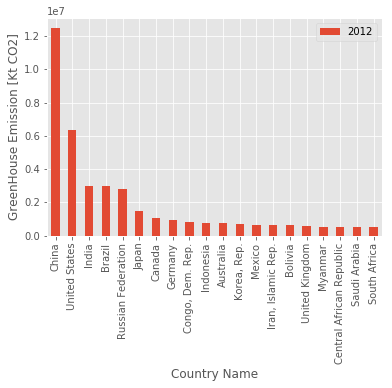

In [6]:
#Sorted bar chart of 2012 greenhouse gases

GreenhouseGasesCountryDf.sort_values(by="2012", ascending=False)[["Country Name", "2012"]]

GreenhouseGasesTop20Emitters = GreenhouseGasesCountryDf.sort_values(by = "2012", ascending = False).iloc[:20,:]

GreenhouseGasesTop20Emitters[["Country Name", "2012"]].plot(x = "Country Name", kind="bar")

plt.ylabel("GreenHouse Emission [Kt CO2]")
plt.show()

Time series for greenhouse gases of major (top 10 depending on V1) present polluters (from 1990 to most-recent)

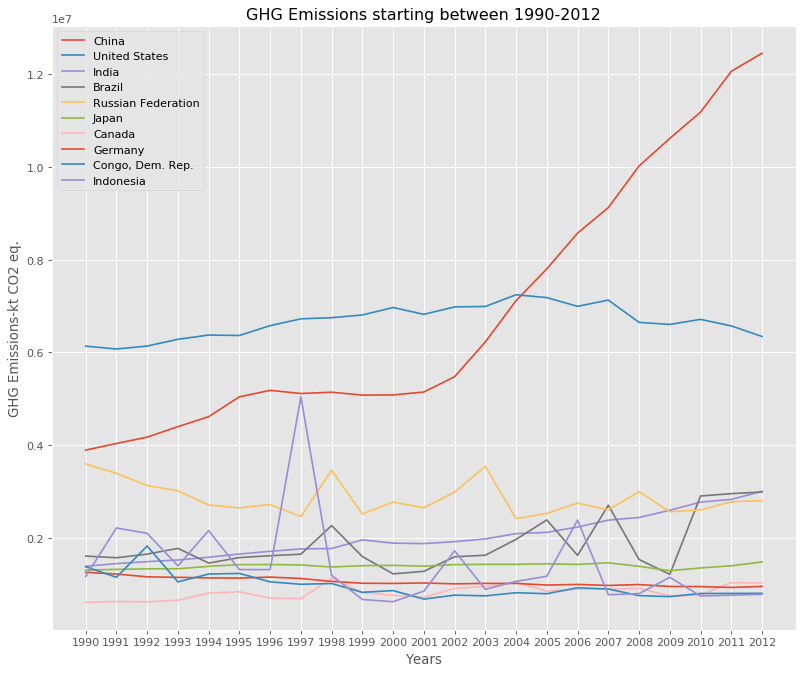

In [8]:
#Time series for ghg emissions of the top 10 most polluting countries.

GreenhouseGasesTop10Emitters = GreenhouseGasesCountryDf.sort_values(by = "2012", ascending = False).iloc[:10,:]

plt.figure(figsize=(12, 10), dpi=80) 

for i in range(0,10):
    
    row = GreenhouseGasesTop10Emitters.iloc[i,22:]
    plt.plot(row)

plt.MaxNLocator(10)
plt.xlabel("Years")
plt.ylabel("GHG Emissions-kt CO2 eq.")
plt.title("GHG Emissions starting between 1990-2012")
#plt.legend(loc=((1.05,0.3)))#how to show country names instead of the numbers 
plt.legend(GreenhouseGasesTop10Emitters["Country Name"] )

plt.show()

We observe that the top polluter of the world China has increasing emissions starting from 1990s till 2012. The second polluter US, on the other hand shows a stable curve over the years. Until 2004 it is the top polluter of the world. India........

NDCs
This file gives data in the format: ISO Country Code,Country Name, Goal Year, Value (in MtCO2e), if goal is a range, and the type of goal.

In [15]:
NDCsDf_raw = pd.read_csv('CW_NDC_quantification_April30.csv')
NDCsDf = NDCsDf_raw.dropna(axis=0).drop(328) #328 is a mis-entry, as determined through inspection

# Check data input
NDCsDf.head(5)

,ISO,Country,Year,Value,Range,Label
0,AFG,Afghanistan,2020,35.5,No,BAU
1,AFG,Afghanistan,2025,40.3,No,Conditional
2,AFG,Afghanistan,2025,41.7,No,BAU
3,AFG,Afghanistan,2030,42.7,No,Conditional
4,AFG,Afghanistan,2030,48.9,No,BAU


Some countries' NDCs are given as a range. For simplicity, this analysis will only examine the mean of that range.

In [16]:
rangedIndices = NDCsDf[NDCsDf['Range'] == 'Yes'].index

# Note that each range is a pair
# Is there a non-for loop method to do this?
for i in range(0,len(rangedIndices)-1,2):    
    NDCsDf.loc[rangedIndices[i],'Value'] = (
        (NDCsDf['Value'][rangedIndices[i]] + NDCsDf['Value'][rangedIndices[i+1]])/2
    )
    
# Drop the column 'Range', since it is not really needed anymore.
NDCsDf = NDCsDf.drop(labels=rangedIndices[1::2], axis=0).drop(labels='Range', axis=1)

From here on, the situation in 2030 will be the primary focus. Where countries have not submitted data for 2030, the furthest value is used. Furthermore, the best case where the higher goal between choices (e.g. uncondintional if both it and conditional exist) is taken.

Note that the EU, which is collectively a large emitter, has only submitted NDCs for 2020.

In [28]:
NDC_byCountry = []

for i in NDCsDf['ISO'].unique():
    NDC_byCountry.append(NDCsDf[NDCsDf['ISO']==i]['Value'].min() )

In [29]:
d = {
    'Country': NDCsDf['ISO'].unique(),
    'Goal':    NDC_byCountry 
}

NDCs_clean = pd.DataFrame(d)

In [30]:
NDCs_clean.head()

,Country,Goal
0,AFG,35.5000
1,ALB,5.4500
2,AND,0.3299
3,AGO,96.6300
4,ATG,0.2910


In [31]:
NDCs_clean

,Country,Goal
0,AFG,35.5000
1,ALB,5.4500
2,AND,0.3299
3,AGO,96.6300
4,ATG,0.2910
5,ARG,369.0000
6,ARM,6.9300
7,AUS,413.4000
8,AUT,63.0400
9,AZE,45.2700


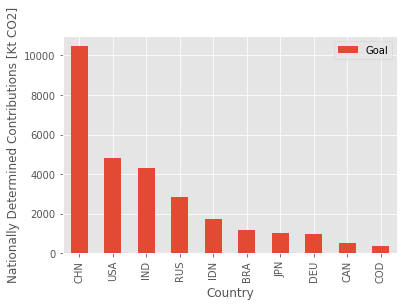

In [36]:
#Greenhouse reductions by countries according to their NDCs. Data is already converted to mtCO2e. Countries have different goals 
#in terms of which year they are based on and which year they aim also unconditional and conditional goals. Here the goals are  
#not based on year target but the minimum goal of each country is choosen?? 

#See if the ones who are most polluting also have the highest reduction aim

GreenhouseGasesTop10Emitters

NDCsTop10 = NDCs_clean[NDCs_clean["Country"].apply(lambda x: True if x in GreenhouseGasesTop10Emitters["Country Code"].values else False)]

NDCsTop10

NDCsTop10= NDCsTop10.sort_values(by="Goal", ascending=False)

NDCsTop10.plot(x = "Country", kind="bar")

plt.ylabel("Nationally Determined Contributions [Kt CO2]")
plt.show()

IND-India
IDN-Indonesia
In the first graph we observed that China,US and India are the top 3 major polluters and their reduction targets allign with this ranking. In the greenhouse gases emission graph the list goes on as Brazil, Russia, Japan, Canada, Germany, Congo and Indonesia. Among these countries even though Indonesia is the least polluting among these, it has higher reduction goals than many of the rest of the countries. 